- 算法
![算法][1]
[1]: http://img.blog.csdn.net/20161108173744178

- 无解析解（梯度下降）
$$
\sigma(x) = sigmod(x) = \frac{e^{x}}{1+e^{x}}
$$
$$
\frac{\partial L(\omega)}{\partial \omega } = \sum_{i=1}^{N} y_{i}x_{i} -  \sum_{i=1}^{N}\frac{e^{x_{i}\cdot \omega}}{1+e^{x_{i}\cdot \omega}}x_{i} = \sum_{i=1}^{N}(y_{i}-\sigma(x_{i}\cdot w))
$$


In [1]:
from numpy import *
import matplotlib.pylab as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
class LogisticRegession(object):

    def __init__(self, path="ex1.txt"):
        self.X, self.y = self.__loadDataSet(path)

    @staticmethod
    def __loadDataSet(path):
        X = []
        y = []
        fp = open(path)
        for line in fp.readlines():
            lineArr = line.strip().split()  # 分割
            X.append([1.0, float(lineArr[0]), float(lineArr[1])]) # 不妨令bias=1
            y.append(int(lineArr[2]))
        return X, y

    @staticmethod
    def __sigmoid(WX):
        return 1./(1+exp(-WX))

    # 梯度上升算法求解最佳回归系数
    def gradAscent(self, X, y, alpha = 0.001, maxCycles = 500):
        '''
        alpha: 初始化alpha的值
        maxCycles: 最大迭代次数
        '''
        X = mat(X)  # 将数组转为矩阵
        y = mat(y).transpose()
        m, n = shape(X)  # 返回矩阵的行和列
        weights = ones((n, 1))# 初始化最佳回归系数
        
        for i in range(0, maxCycles):
            weights = weights + alpha * X.transpose() * (y - self.__sigmoid(X * weights)) # 梯度上升(矩阵相乘)
            
        return weights.getA1()

    # 随机梯度上升算法求回归系数
    def stocGradAscent0(self, X, y, alpha = 0.01): 
        X = array(X)
        m, n = shape(X)
        weights = ones(n)
        
        for i in range(0, m):
            weights = weights + alpha * X[i] * (y[i] - self.__sigmoid(sum(X[i]*weights)))  # 数组相乘即可 
            
        return weights
    
    # 改进版的随机梯度上升算法
    def stocGradAscent1(self, X, y, numIter=150):
        X = array(X)
        m,n = shape(X)
        weights = ones(n)
        for i in range(0,numIter):
            dataIndex = list(range(m))
            for j in range(0,m):
                alpha = 4/(1.0+j+i)+0.01
                randIndex = int(random.uniform(0,len(dataIndex)))
                weights = weights + alpha * X[randIndex] * (y[randIndex] - self.__sigmoid(sum(X[randIndex] * weights)))
                del(dataIndex[randIndex])
            
        return weights
    
    #分析数据，画出决策边界
    @staticmethod
    def dataScatter(X, y):
        X = array(X)
        plt.scatter(X[:, 1], X[:, 2], c=array(lr.y)[:, newaxis], s=100, lw=0, cmap='RdYlGn')
    @staticmethod
    def plotBestFit(*args, X, y): # weights为一维列表或数组
        X = array(X)  #将矩阵转化为数组
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.scatter(X[:, 1], X[:, 2], c=y, s=100, lw=0, cmap='RdYlGn')
        x = arange(-3.0,3.0,0.1)
        for w in args:
            y = (-w[0]-w[1] * x)/w[2] # w0x0 + w1x1 + w2x2 = 0解出x1与x2的关系式（即决策边界,注意x0=1）
            ax.plot(x,y)
        plt.xlabel("X1")     #X轴的标签
        plt.ylabel("X2")     #Y轴的标签
        plt.show()

In [3]:
lr = LogisticRegession()

In [4]:
X_y = X, y = lr.X, lr.y

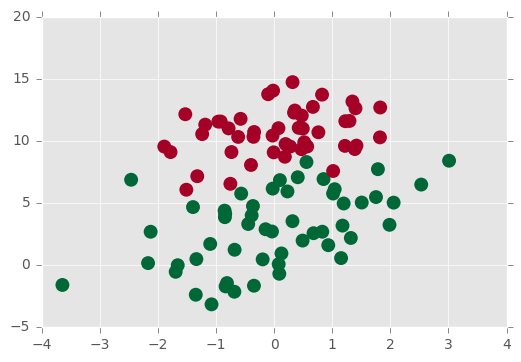

In [5]:
lr.dataScatter(*X_y)

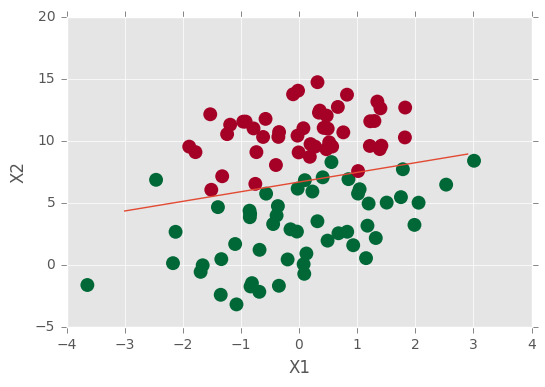

In [6]:
lr.plotBestFit(lr.gradAscent(*X_y), X=X, y=y)

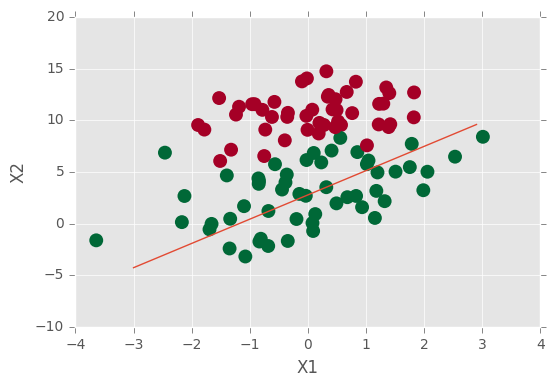

In [7]:
lr.plotBestFit(lr.stocGradAscent0(*X_y), X=X, y=y)

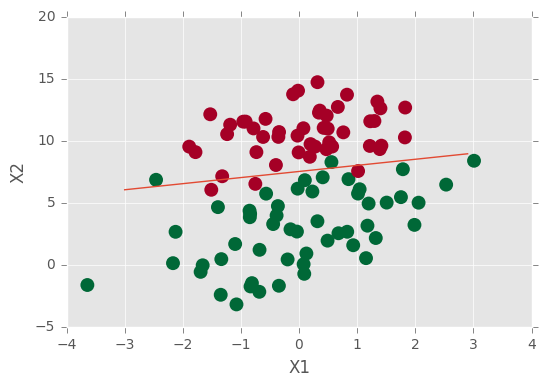

In [8]:
lr.plotBestFit(lr.stocGradAscent1(*X_y), X=X, y=y)

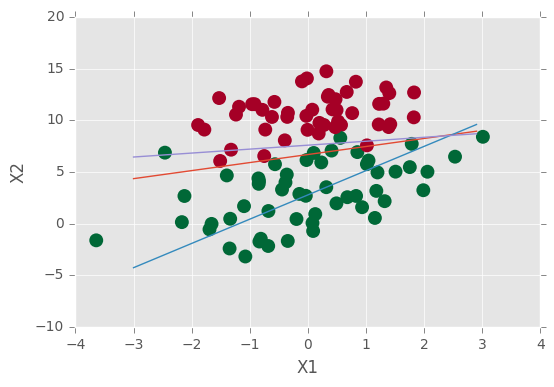

In [9]:
lr.plotBestFit(lr.gradAscent(*X_y), lr.stocGradAscent0(*X_y), lr.stocGradAscent1(*X_y), X=X, y=y)